In [ ]:
import numpy as np

class KMeans:
    def __init__(self, k=3, max_iter=100):
        """
        Initialize K-Means model.

        Parameters:
        k (int): Number of clusters.
        max_iter (int): Maximum iterations.
        """
        self.k = k
        self.max_iter = max_iter

    def initialize_centroids(self, X):
        """
        Initialize centroids randomly.

        Parameters:
        X (numpy array): Data points.

        Returns:
        centroids (numpy array): Initial centroids.
        """
        indices = np.random.choice(X.shape[0], self.k, replace=False) # random chose from indices
        print("indices: ", indices)
        centroids = X[indices, :]
        print("centroids: ", centroids)
        print("centroids_axis: ", centroids[:, np.newaxis])
        return centroids

    def assign_clusters(self, X, centroids):
        """
        Assign each data point to the closest centroid.

        Parameters:
        X (numpy array): Data points.
        centroids (numpy array): Current centroids.

        Returns:
        labels (numpy array): Cluster assignments.
        """
        distances = np.sqrt(((X - centroids[:, np.newaxis]) ** 2).sum(axis=2)) # distance of 100 data points from 3 centroids
        print("distances: ", distances) # 3 distance list each contain distance of 100 data points from 3 centroids 
        labels = np.argmin(distances, axis=0) # over row index of centroids for minimum distance of one data point from 3 centroids
        print("labels: ", labels) # 100 label contain index of centroids for minimum distance of each data point 
        return labels
    
    # [0.47814162 0.3080505  0.4359472  0.66862471 0.41293558]
    # [0.47793852 0.32999103 0.40372826 0.64798434 0.51641498]
    # [0.14306129 0.20562852 0.         0.2462733  0.60040816]
    # label = [2,2,2,2,0] # min distance centroids index over row 

    def update_centroids(self, X, labels):
        """
        Update centroids based on cluster assignments.

        Parameters:
        X (numpy array): Data points.
        labels (numpy array): Cluster assignments.

        Returns:
        centroids (numpy array): Updated centroids.
        """
        centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.k)])
        # labels == i: This creates a boolean mask where True indicates that the label is equal to i.
        # X[labels == i]: This selects the rows of X where the label is equal to i.
        # separate or cluster data points into 3 clusters according to lebels they are belonged
        # mean of data points over row in each cluster (3 clusters) get 3 dataset (mean of data points) as centroids
        print("updated centroids: ", centroids)
        return centroids

    def fit(self, X):
        """
        Run K-Means clustering.

        Parameters:
        X (numpy array): Data points.
        """
        centroids = self.initialize_centroids(X)
        print("Initial centroids: ", centroids)
        for _ in range(self.max_iter):
            labels = self.assign_clusters(X, centroids)
            new_centroids = self.update_centroids(X, labels)
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids
        self.centroids = centroids
        self.labels = labels

    def predict(self, X):
        """
        Assign new data points to existing clusters.

        Parameters:
        X (numpy array): New data points.

        Returns:
        labels (numpy array): Cluster assignments.
        """
        distances = np.sqrt(((X - self.centroids[:, np.newaxis]) ** 2).sum(axis=2))
        
        labels = np.argmin(distances, axis=0)
        return labels




In [8]:
# Example usage
np.random.seed(0)
X = np.random.rand(100, 2)

In [9]:
X

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       [0.43758721, 0.891773  ],
       [0.96366276, 0.38344152],
       [0.79172504, 0.52889492],
       [0.56804456, 0.92559664],
       [0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985],
       [0.77815675, 0.87001215],
       [0.97861834, 0.79915856],
       [0.46147936, 0.78052918],
       [0.11827443, 0.63992102],
       [0.14335329, 0.94466892],
       [0.52184832, 0.41466194],
       [0.26455561, 0.77423369],
       [0.45615033, 0.56843395],
       [0.0187898 , 0.6176355 ],
       [0.61209572, 0.616934  ],
       [0.94374808, 0.6818203 ],
       [0.3595079 , 0.43703195],
       [0.6976312 , 0.06022547],
       [0.66676672, 0.67063787],
       [0.21038256, 0.1289263 ],
       [0.31542835, 0.36371077],
       [0.57019677, 0.43860151],
       [0.98837384, 0.10204481],
       [0.20887676, 0.16130952],
       [0.65310833, 0.2532916 ],
       [0.46631077, 0.24442559],
       [0.

In [21]:
[0 == 0]

[True]

In [23]:
[[0 == i] for i in range(3)]

[[True], [False], [False]]

In [25]:
labels = [1,2,0,1,0]

In [ ]:
[X[0 == i].mean(axis=0) for i in range(3)] # data points belongs to cluster 0

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4484\3037875047.py:1: RuntimeWarning: Mean of empty slice.
  [X[0== i].mean(axis=0) for i in range(3)]
d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\numpy\_core\_methods.py:139: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([[0.5488135 , 0.71518937],
        [0.60276338, 0.54488318],
        [0.4236548 , 0.64589411],
        [0.43758721, 0.891773  ],
        [0.96366276, 0.38344152],
        [0.79172504, 0.52889492],
        [0.56804456, 0.92559664],
        [0.07103606, 0.0871293 ],
        [0.0202184 , 0.83261985],
        [0.77815675, 0.87001215],
        [0.97861834, 0.79915856],
        [0.46147936, 0.78052918],
        [0.11827443, 0.63992102],
        [0.14335329, 0.94466892],
        [0.52184832, 0.41466194],
        [0.26455561, 0.77423369],
        [0.45615033, 0.56843395],
        [0.0187898 , 0.6176355 ],
        [0.61209572, 0.616934  ],
        [0.94374808, 0.6818203 ],
        [0.3595079 , 0.43703195],
        [0.6976312 , 0.06022547],
        [0.66676672, 0.67063787],
        [0.21038256, 0.1289263 ],
        [0.31542835, 0.36371077],
        [0.57019677, 0.43860151],
        [0.98837384, 0.10204481],
        [0.20887676, 0.16130952],
        [0.65310833, 0.2532916 ],
        [0.466

In [10]:

kmeans = KMeans(k=3)

In [11]:
kmeans

In [12]:
kmeans.fit(X)

indices:  [91 29  2]
centroids:  [[0.57722859 0.23789282]
 [0.46631077 0.24442559]
 [0.4236548  0.64589411]]
centroids_axis:  [[[0.57722859 0.23789282]]

 [[0.46631077 0.24442559]]

 [[0.4236548  0.64589411]]]
Initial centroids:  [[0.57722859 0.23789282]
 [0.46631077 0.24442559]
 [0.4236548  0.64589411]]
distances:  [[0.47814162 0.3080505  0.4359472  0.66862471 0.41293558 0.36151203
  0.68776514 0.52816713 0.81483777 0.66328498 0.69002389 0.55484421
  0.61013572 0.82932516 0.18524118 0.6208268  0.35201901 0.67532095
  0.38064147 0.57568059 0.2950571  0.2146217  0.44191102 0.38268749
  0.29046432 0.20083183 0.43300704 0.37622875 0.07742646 0.11111003
  0.43726577 0.1272754  0.40250299 0.28150215 0.29678048 0.46112333
  0.54247627 0.25639623 0.31707492 0.30530477 0.31355162 0.68548855
  0.02947885 0.15374058 0.69140456 0.50138821 0.65368799 0.29297447
  0.21798308 0.34313212 0.10559033 0.74132137 0.47150716 0.33468707
  0.79777155 0.62226874 0.13598064 0.2848211  0.45852987 0.54719355
  

In [ ]:
print("Centroids:")
print(kmeans.centroids)
print("Cluster Assignments:")
print(kmeans.labels)

new_data = np.random.rand(10, 2)
new_labels = kmeans.predict(new_data)
print("New Cluster Assignments:")
print(new_labels)

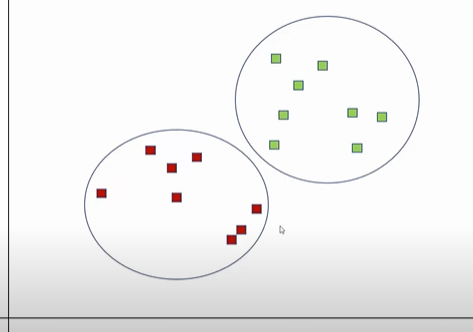

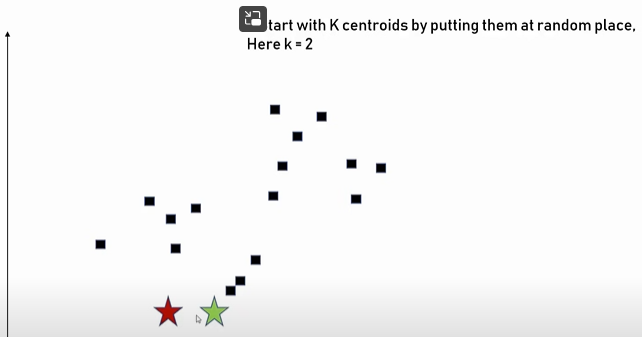

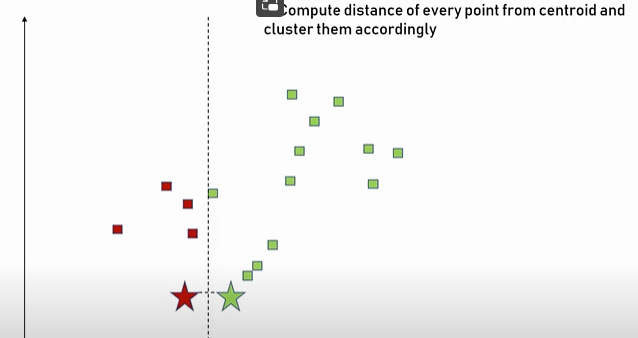

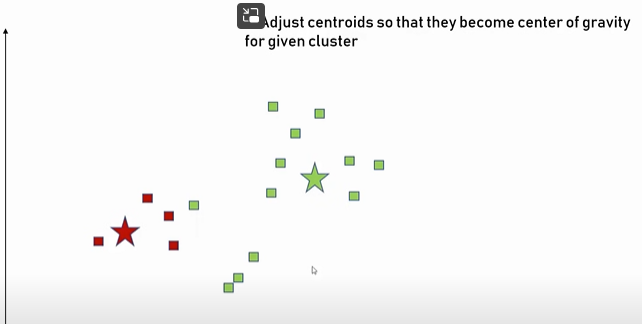

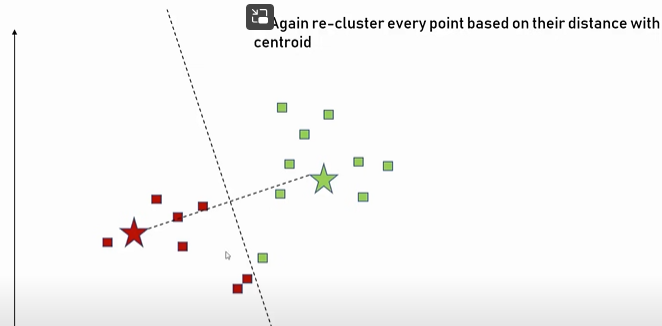

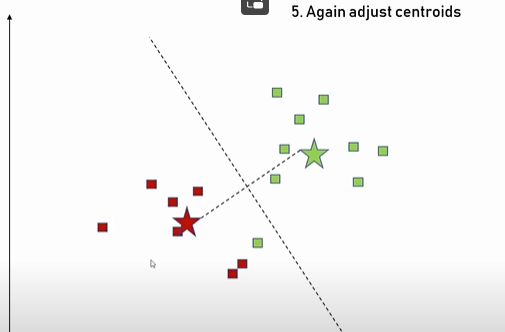

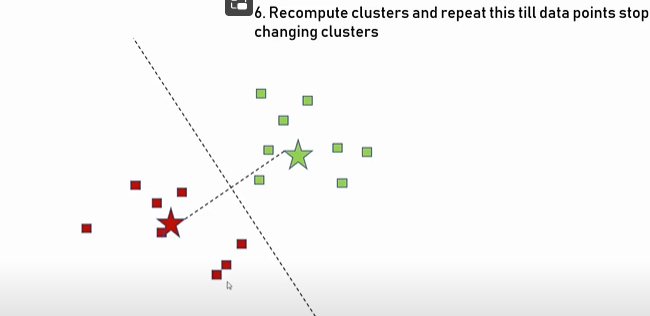

 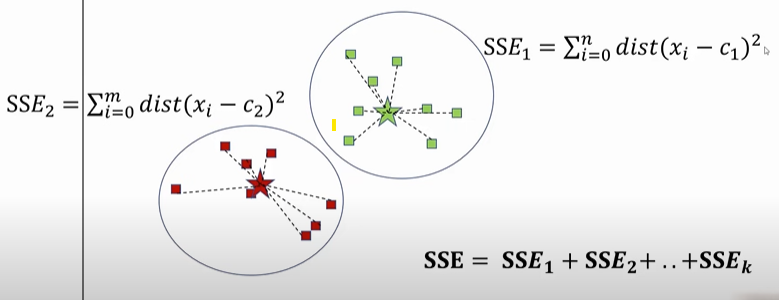

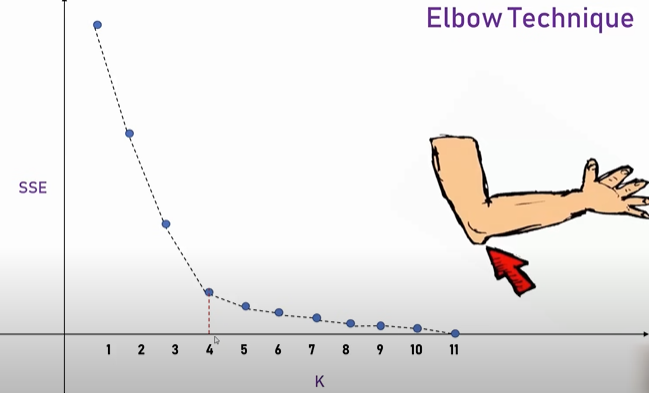

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:

df = pd.read_csv("income.csv")
df.head()

,name,age,income
0,John,25,45000
1,Jane,30,55000
2,Rob,27,45000
3,Michael,29,75000
4,Kory,43,120000


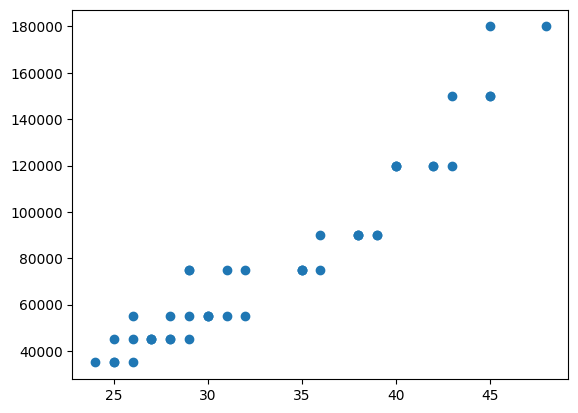

In [5]:
plt.scatter(df.age,df.income)

In [6]:
km = KMeans(n_clusters=3)

In [7]:
y_predicted = km.fit_predict(df[['age','income']]) # [[]]

In [8]:
y_predicted

array([0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 2, 2, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 0, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2, 2,
       0], dtype=int32)

In [9]:
df['cluster'] = y_predicted

In [10]:
df.head()

,name,age,income,cluster
0,John,25,45000,0
1,Jane,30,55000,0
2,Rob,27,45000,0
3,Michael,29,75000,2
4,Kory,43,120000,1


In [11]:
km.cluster_centers_

array([[2.76500000e+01, 4.70000000e+04],
       [4.30000000e+01, 1.39090909e+05],
       [3.50000000e+01, 8.14285714e+04]])

In [13]:
cluster0 = df[df['cluster']==0]

In [15]:
cluster0.head()

,name,age,income,cluster
0,John,25,45000,0
1,Jane,30,55000,0
2,Rob,27,45000,0
5,Emily,28,45000,0
7,Sarah,26,35000,0


In [16]:
cluster1 = df[df['cluster']==1]

In [17]:
cluster1.head()

,name,age,income,cluster
4,Kory,43,120000,1
8,James,40,120000,1
12,George,45,150000,1
16,Robert,42,120000,1
20,Charles,48,180000,1


In [18]:
cluster2 = df[df['cluster']==2]

In [20]:
cluster2.head()

,name,age,income,cluster
3,Michael,29,75000,2
6,David,35,75000,2
10,William,38,90000,2
13,Mia,29,75000,2
14,Kevin,36,90000,2


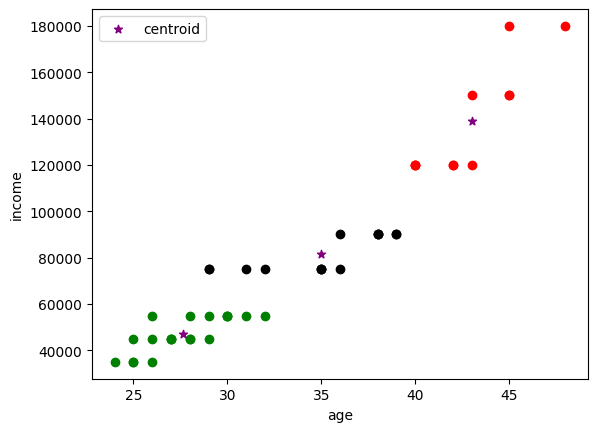

In [22]:

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.age,df1.income,color='green')
plt.scatter(df2.age,df2.income,color='red')
plt.scatter(df3.age,df3.income,color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('age')
plt.ylabel('income')
plt.legend()


In [27]:
df['age']

0     25
1     30
2     27
3     29
4     43
5     28
6     35
7     26
8     40
9     32
10    38
11    24
12    45
13    29
14    36
15    27
16    42
17    31
18    39
19    25
20    48
21    30
22    35
23    26
24    40
25    28
26    45
27    32
28    38
29    42
30    29
31    36
32    27
33    39
34    30
35    43
36    25
37    40
38    28
39    35
40    26
41    45
42    31
43    38
44    29
Name: age, dtype: int64

Preprocessing using min max scaler

In [29]:

scaler = MinMaxScaler()

scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']]) #[[]]

scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])

In [33]:
scaler = MinMaxScaler()
df['age'] = scaler.fit_transform(df[['age']]) #[[]]

In [42]:
dir(scaler)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_reset',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'clip',
 'copy',
 'data_max_',
 'data_min_',
 'data_range_',
 'feature_names_in_',
 'feature_range',
 '

In [34]:
columns = ['age','income']
for column in columns:
    df[column] = scaler.fit_transform(df[[column]]) #[[]]

df.head()

,name,age,income,cluster
0,John,0.041667,0.068966,0
1,Jane,0.250000,0.137931,0
2,Rob,0.125000,0.068966,0
3,Michael,0.208333,0.275862,2
4,Kory,0.791667,0.586207,1


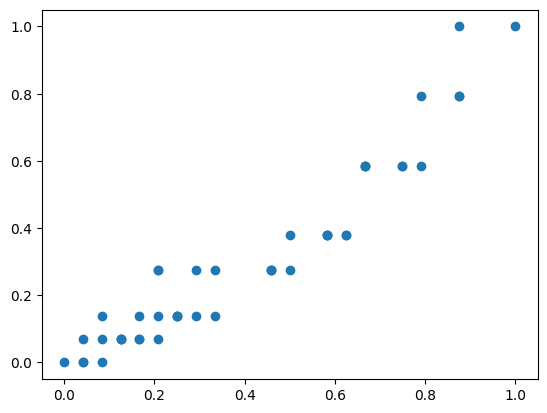

In [35]:
plt.scatter(df.age,df['income'])

In [36]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['age','income']])
y_predicted

array([0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 0, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2, 2,
       0], dtype=int32)

In [37]:

df['cluster']=y_predicted
df.head()

,name,age,income,cluster
0,John,0.041667,0.068966,0
1,Jane,0.250000,0.137931,0
2,Rob,0.125000,0.068966,0
3,Michael,0.208333,0.275862,0
4,Kory,0.791667,0.586207,1


In [38]:
km.cluster_centers_

array([[0.15719697, 0.10031348],
       [0.79166667, 0.71786834],
       [0.5       , 0.32758621]])

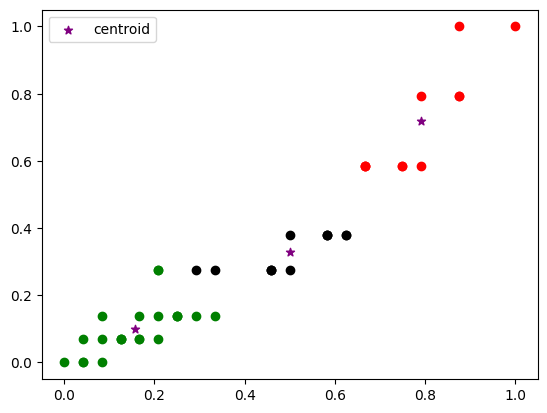

In [40]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.age,df1['income'],color='green')
plt.scatter(df2.age,df2['income'],color='red')
plt.scatter(df3.age,df3['income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()


Elbow Plot

In [41]:
dir(km)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_algorithm',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params_vs_input',
 '_check_test_data',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_features_out',
 '_n_init',
 '_n_threads',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_ht

In [ ]:
km.inertia_ # sum of standard square error 
# Inertia, also known as Sum of Squared Errors (SSE), is the sum of the squared 
# distances between each data point and its assigned cluster centroid.

0.846316257852004

Inertia = ∑[i=1 to n] ∑[j=1 to k] (x_i - μ_j)^2
where:
x_i is the i-th data point
μ_j is the centroid of the j-th cluster
n is the total number of data points
k is the number of clusters


In [ ]:
sse = [] #sum standard squre error
k_rng = range(1,10) # k value 1 to 10
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['age','income']])
    sse.append(km.inertia_)

In [45]:
sse

[6.750883079373469,
 1.807052996708989,
 0.846316257852004,
 0.6839109414168868,
 0.49830114495784095,
 0.30376554219697316,
 0.18321060823754798,
 0.12514252557030878,
 0.09007194082299982]

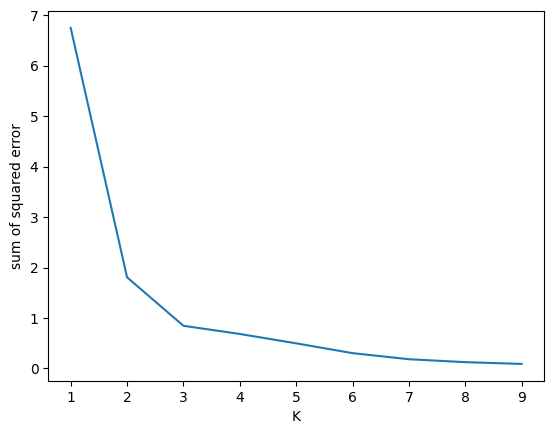

In [46]:
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)